In [ ]:
import os
import pandas as pd

def remove_columns_from_csv(folder_path):
    # 遍历文件夹中的每个文件
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            
            # 读取 CSV 文件
            df = pd.read_csv(file_path)
            
            # 指定要删除的列（第1-4列和第6-7列）
            columns_to_remove = df.columns[0:3].tolist() + df.columns[4:7].tolist()
            
            # 删除指定的列
            df.drop(columns=columns_to_remove, inplace=True)
            
            # 保存修改后的 CSV 文件
            df.to_csv(file_path, index=False)
            print(f"Processed file: {filename}")

# 指定包含 CSV 文件的文件夹路径
folder_path = '/Users/mac/Documents/An/单细胞m6A数据库/曹叶+昕悦/数据/m6A'

# 调用函数
remove_columns_from_csv(folder_path)


In [ ]:
import os
import pandas as pd

def add_prefix_and_remove_columns(folder_path):
    # 遍历文件夹中的每个文件
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            
            # 读取 CSV 文件
            df = pd.read_csv(file_path)
            
            # 获取文件名前第一个"_"之前的内容作为前缀
            prefix = filename.split('_')[0]
            
            # 获取第一列的列名
            first_col_name = df.columns[0]
            
            # 为除第一列以外的列添加前缀
            new_columns = [first_col_name] + [f"{prefix}_{col}" for col in df.columns[1:]]
            df.columns = new_columns
            
            # 保存修改后的 CSV 文件
            df.to_csv(file_path, index=False)
            print(f"Processed file: {filename}")

# 指定包含 CSV 文件的文件夹路径
folder_path = '/Users/mac/Documents/An/单细胞m6A数据库/曹叶+昕悦/数据/m6A'

# 调用函数
add_prefix_and_remove_columns(folder_path)


In [ ]:
import scanpy as sc
import anndata as ad

samples = {
    "AML":"AML_Scm6A_pred_results.csv",
    "ATC":"ATC_Scm6A_pred_results.csv",
    "BLCA":"BLCA_Scm6A_pred_results_addinf.csv",
    "BRCA":"BRCA_Scm6A_pred_results_addinf.csv",
    "CESC":"CESC_Scm6A_pred_results_addinf.csv",
    "COAD":"COAD_Scm6A_pred_results_addinf.csv",
    "ESCA":"ESCA_Scm6A_pred_results_addinf.csv",
    "GBM":"GBM_Scm6A_pred_results.csv",
    "HCC":"HCC_Scm6A_pred_results.csv",
    "HNSC":"HNSC_Scm6A_pred_results_addinf.csv",
    "KIRC":"KIRC_Scm6A_pred_results_addinf.csv",
    "LGG":"LGG_Scm6A_pred_results.csv",
    "LUAD":"LUAD_Scm6A_pred_results.csv",
    "LUSC":"LUSC_Scm6A_pred_results.csv",
    "MCC":"MCC_Scm6A_pred_results.csv",
    "MES":"MES_Scm6A_pred_results.csv",
    "NBL":"NBL_Scm6A_pred_results.csv",
    "NSCLC":"NSCLC_Scm6A_pred_results.csv",
    "OS":"OS_Scm6A_pred_results.csv",
    "OV":"OV_Scm6A_pred_results.csv",
    "PDAC":"PDAC_Scm6A_pred_results.csv",
    "PRAD":"PRAD_Scm6A_pred_results.csv",
    "READ":"READ_Scm6A_pred_results.csv",
    "SKCM":"SKCM_Scm6A_pred_results.csv",
    "STAD":"STAD_Scm6A_pred_results.csv",
    "TGCT":"TGCT_Scm6A_pred_results.csv",
    "THCA":"THCA_Scm6A_pred_results.csv",
    "TNBC":"TNBC_Scm6A_pred_results.csv",
    "UCEC":"UCEC_Scm6A_pred_results.csv"
}
adatas = {}

for sample_id, filename in samples.items():
    sample_data = sc.read_csv(filename, delimiter=',', first_column_names=0, dtype='float32').T
    sample_data.var_names_make_unique()
    adatas[sample_id] = sample_data

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
    
# ！注意：行是细胞，列是基因。与Seurat读取结果相反！
#print(adata.obs_names) #行名(细胞名)
#print(adata.var_names) #列名(基因名)
## 原始信息以稀疏矩阵形式储存
#print(adata.X)

In [ ]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [ ]:
sc.pl.pca(
    adata,
    color=["sample"]
)

In [ ]:
sc.pp.neighbors(adata)

In [ ]:
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color="sample",
    size=2
)

In [ ]:
print(sns.palettes.SEABORN_PALETTES.keys())

In [ ]:
import seaborn as sns

# 定义自定义调色板
# 使用tab20、tab20b和tab20c组合生成33种颜色
palette1 = sns.color_palette("husl", 1)
palette2 = sns.color_palette("tab20", 20)
palette3 = sns.color_palette("colorblind", 6)
palette4 = sns.color_palette("pastel", 6)
palette5 = sns.color_palette("bright", 7)

custom_palette = palette5 + palette1 + palette2 + palette4 # 组合成33种颜色

#custom_palette = sns.color_palette("hls", adata.obs['sample'].nunique())

# 使用sc.pl.umap的palette参数
sc.pl.umap(adata, color="sample", size=2, palette=custom_palette, save= "UMAP_plot_29.pdf")


In [ ]:
## 分群
sc.tl.leiden(adata, resolution=0.5,key_added="cluster")
adata.obs
sc.pl.umap(adata, color=['cluster'])

In [ ]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

In [ ]:
sc.pl.umap(adata, color=["leiden"])

In [1]:
import os
import pandas as pd
from scanorama import integrate_scanpy
import anndata as ad
import scanpy as sc

Found 4162 genes among all datasets
[[0.         0.00129786 0.13818961 0.68987681 0.00696304 0.17675415
  0.01178361 0.33101232 0.74397429 0.05034815 0.18907338 0.00910552
  0.0042328  0.1336478  0.00214247 0.01392608 0.01052632 0.14783074
  0.00321371 0.00160686 0.08087841 0.03053026 0.         0.00293542
  0.00817996 0.00642742 0.00107124 0.00535619 0.00536193]
 [0.         0.         0.10577547 0.01168073 0.14990266 0.10447761
  0.12589228 0.00324465 0.00778715 0.15768981 0.07008436 0.22323167
  0.09312169 0.00786164 0.54574951 0.79883193 0.02807018 0.0220636
  0.80142764 0.12070084 0.01427644 0.02141467 0.3036989  0.09393346
  0.03680982 0.10837119 0.15704088 0.06554186 0.06970509]
 [0.         0.         0.         0.42941492 0.12958435 0.66585291
  0.28458864 0.11494526 0.01593625 0.74189175 0.52841798 0.08159546
  0.30793651 0.22641509 0.05774955 0.07001152 0.1005848  0.285365
  0.04132539 0.01984127 0.46229972 0.10368664 0.0651341  0.02250489
  0.47648262 0.03246938 0.03461457 

/Users/mac/miniforge3/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/mac/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


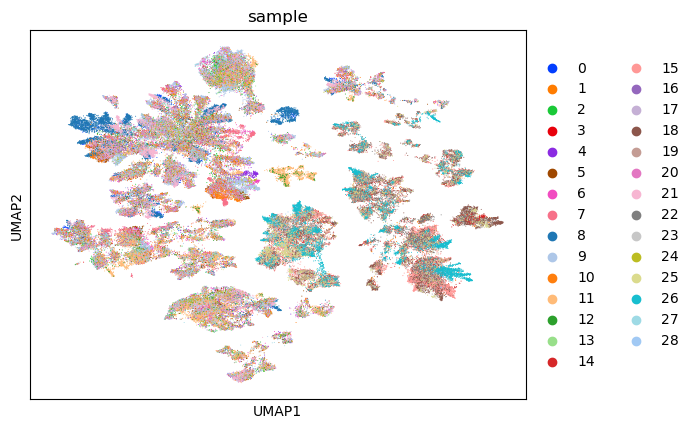

In [2]:
# 1. 加载样本
samples = {
    "AML":"AML_Scm6A_pred_results.csv",
    "ATC":"ATC_Scm6A_pred_results.csv",
    "BLCA":"BLCA_Scm6A_pred_results_addinf.csv",
    "BRCA":"BRCA_Scm6A_pred_results_addinf.csv",
    "CESC":"CESC_Scm6A_pred_results_addinf.csv",
    "COAD":"COAD_Scm6A_pred_results_addinf.csv",
    "ESCA":"ESCA_Scm6A_pred_results_addinf.csv",
    "GBM":"GBM_Scm6A_pred_results.csv",
    "HCC":"HCC_Scm6A_pred_results.csv",
    "HNSC":"HNSC_Scm6A_pred_results_addinf.csv",
    "KIRC":"KIRC_Scm6A_pred_results_addinf.csv",
    "LGG":"LGG_Scm6A_pred_results.csv",
    "LUAD":"LUAD_Scm6A_pred_results.csv",
    "LUSC":"LUSC_Scm6A_pred_results.csv",
    "MCC":"MCC_Scm6A_pred_results.csv",
    "MES":"MES_Scm6A_pred_results.csv",
    "NBL":"NBL_Scm6A_pred_results.csv",
    "NSCLC":"NSCLC_Scm6A_pred_results.csv",
    "OS":"OS_Scm6A_pred_results.csv",
    "OV":"OV_Scm6A_pred_results.csv",
    "PDAC":"PDAC_Scm6A_pred_results.csv",
    "PRAD":"PRAD_Scm6A_pred_results.csv",
    "READ":"READ_Scm6A_pred_results.csv",
    "SKCM":"SKCM_Scm6A_pred_results.csv",
    "STAD":"STAD_Scm6A_pred_results.csv",
    "TGCT":"TGCT_Scm6A_pred_results.csv",
    "THCA":"THCA_Scm6A_pred_results.csv",
    "TNBC":"TNBC_Scm6A_pred_results.csv",
    "UCEC":"UCEC_Scm6A_pred_results.csv"
}

adatas = []

# 2. 读取每个文件并存入 list
for sample_id, filename in samples.items():
    sample_data = sc.read_csv(filename, delimiter=',', first_column_names=0, dtype='float32').T
    sample_data.var_names_make_unique()
    sample_data.obs["batch"] = sample_id
    adatas.append(sample_data)

# 3. 去批次（使用Scanorama）
integrate_scanpy(adatas, dimred=50)  # 默认使用前50个主成分

# 4. 合并整合后的AnnData对象
adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()

# 5. 使用 Scanorama 的结果生成邻接图
sc.pp.neighbors(adata, use_rep="X_scanorama")
sc.tl.umap(adata)

# 6. 自定义颜色
import seaborn as sns
palette1 = sns.color_palette("husl", 1)
palette2 = sns.color_palette("tab20", 20)
palette3 = sns.color_palette("colorblind", 6)
palette4 = sns.color_palette("pastel", 6)
palette5 = sns.color_palette("bright", 7)
custom_palette = palette5 + palette1 + palette2 + palette4

# 7. 绘图
sc.pl.umap(adata, color="sample", size=2, palette=custom_palette, save="UMAP_batch_corrected.pdf")


In [1]:
# 1. 加载样本
samples = {
    "AML":"AML_Scm6A_pred_results.csv",
    "ATC":"ATC_Scm6A_pred_results.csv",
    "BLCA":"BLCA_Scm6A_pred_results_addinf.csv",
    "BRCA":"BRCA_Scm6A_pred_results_addinf.csv",
    "CESC":"CESC_Scm6A_pred_results_addinf.csv",
    "COAD":"COAD_Scm6A_pred_results_addinf.csv",
    "ESCA":"ESCA_Scm6A_pred_results_addinf.csv",
    "GBM":"GBM_Scm6A_pred_results.csv",
    "HCC":"HCC_Scm6A_pred_results.csv",
    "HNSC":"HNSC_Scm6A_pred_results_addinf.csv",
    "KIRC":"KIRC_Scm6A_pred_results_addinf.csv",
    "LGG":"LGG_Scm6A_pred_results.csv",
    "LUAD":"LUAD_Scm6A_pred_results.csv",
    "LUSC":"LUSC_Scm6A_pred_results.csv",
    "MCC":"MCC_Scm6A_pred_results.csv",
    "MES":"MES_Scm6A_pred_results.csv",
    "NBL":"NBL_Scm6A_pred_results.csv",
    "NSCLC":"NSCLC_Scm6A_pred_results.csv",
    "OS":"OS_Scm6A_pred_results.csv",
    "OV":"OV_Scm6A_pred_results.csv",
    "PDAC":"PDAC_Scm6A_pred_results.csv",
    "PRAD":"PRAD_Scm6A_pred_results.csv",
    "READ":"READ_Scm6A_pred_results.csv",
    "SKCM":"SKCM_Scm6A_pred_results.csv",
    "STAD":"STAD_Scm6A_pred_results.csv",
    "TGCT":"TGCT_Scm6A_pred_results.csv",
    "THCA":"THCA_Scm6A_pred_results.csv",
    "TNBC":"TNBC_Scm6A_pred_results.csv",
    "UCEC":"UCEC_Scm6A_pred_results.csv"
}

adatas = []

In [18]:
# 2. 读取每个文件并存入 list
for sample_id, filename in samples.items():
    sample_data = sc.read_csv(filename, delimiter=',', first_column_names=0, dtype='float32').T
    sample_data.var_names_make_unique()
    sample_data.obs["batch"] = sample_id
    adatas.append(sample_data)

In [22]:
# 4. 合并整合后的AnnData对象
adata = ad.concat(adatas, label="sample")


/Users/mac/miniforge3/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
# 5. 使用 Scanorama 的结果生成邻接图
sc.pp.neighbors(adata, use_rep="X_scanorama")
sc.tl.umap(adata)

AnnData object with n_obs × n_vars = 241854 × 4162
    obs: 'sample'

In [ ]:
# 3. 去批次（使用Scanorama）
integrate_scanpy(adatas, dimred=50)  # 默认使用前50个主成分

Found 4162 genes among all datasets


In [ ]:
adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()

In [ ]:
sc.pp.neighbors(adata, use_rep="X_scanorama")
sc.tl.umap(adata)

sc.pl.umap(adata, color="sample", size=2, palette=custom_palette, save="UMAP_batch_corrected.pdf")


In [ ]:
# 1. 设置 sample 为 Categorical，确保分类顺序一致
sample_list = list(samples.keys())
adata.obs['sample'] = pd.Categorical(adata.obs['sample'], categories=sample_list)

# 2. 绘图
sc.pl.umap(
    adata,
    color="sample",
    size=2,
    palette=custom_palette[:len(sample_list)],
    legend_loc="right margin",
    save="_UMAP_batch_corrected_labeled.pdf"
)


In [ ]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

In [ ]:
sc.pl.umap(adata, color=["leiden"])

In [ ]:
import scanpy as sc
import harmonypy as hm

# 标准预处理流程
sc.pp.normalize_total(adata, target_sum=1e4)  # 总量归一化
sc.pp.log1p(adata)                            # log 转换
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)  # 挑选高变基因
sc.pp.scale(adata, max_value=10)             # 标准化

# PCA降维
sc.tl.pca(adata, svd_solver='arpack')

# 使用 Harmony 去批次
ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, 'sample')
adata.obsm['X_pca_harmony'] = ho.Z_corr.T

# 后续用 Harmony 去批次后的 PCA 结果进行聚类和可视化
sc.pp.neighbors(adata, use_rep='X_pca_harmony')  # 使用去批次后的降维结果
sc.tl.umap(adata)
sc.tl.leiden(adata)  # 或其他聚类方法

# 绘图
sc.pl.umap(adata, color=['sample', 'leiden'])
